# Случайные блуждания

В этом блоке мы 
- познакомимся со случайными блужданиями.
- Узнаем, что это такое, как их можно построить и в каких случаях они стационарны

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline

рассмотрим такую задачу: Очень нерешительный таракан Афанасий путешествует по числовой прямой. В каждый момент времени он подбрасывает монетку: если выпал орел, идет на один сантиметр вперед, а если решка, то назад.

Такие последовательности называются случайными блужданиями. В них каждое следующее положение получается из предыдущего добавлением какого-нибудь белого шума. В нашем случае - равномерного со значениями -1 и 1. Другими словами, приращения случайных блужданий  - белый шум, то есть абсолютно случайны.
Создадим функцию, которая будет генерировать последовательность координат Афанасия на прямой

Uni означает, что в качестве случайности берется равновероятная (Uniform) модель

rwalk - random walk. 

In [2]:
def unirwalk(num):
    uwalk = np.zeros(num)
    for i in range (1,num):
        # random.randint(-1,1) имитирует подброс монетки. Афанасий сдвигается на один см влево (-1) или вправо (1)
        # относительно прыдыдущего положения uwalk[i-1]
        uwalk[i] = uwalk[i-1] + 2*random.randint(0,1)-1
    return uwalk

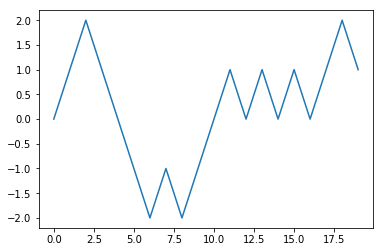

In [5]:
# посмотрим, как будет выглядеть блуждание на 20 шагах
walk = unirwalk(20)
plt.plot(walk)

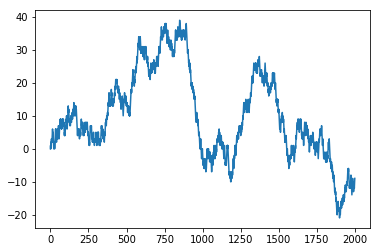

In [9]:
# посмотрим, как будет выглядеть блуждание на 2000 шагах
walk2 = unirwalk(2000)
plt.plot(walk2)

Чем больше временной интервал, тем дальше будет удалаяться Афанасий от точки старта

In [10]:
# среднее значение и стандартное отклонение случайного блуждания:
print('mean и std для num=20:',np.mean(walk), np.std(walk))
print('mean и std для num=2000:',np.mean(walk2), np.std(walk2))

mean и std для num=20: 0.2 1.1224972160321824
mean и std для num=2000: 9.993 13.26875845736895


Давайте создадим нормальное случайное блуждание

In [11]:
# num - число шагов
# a - множитель. В каждый момент времени следующее значение равно a*текущее + белый шум
# mu, sigma - параметры шума
def normrwalk(num,a, mu, sigma):
    eps = np.random.normal(mu, sigma, size=num)
    walk = np.zeros(num)
    walk[0] = eps[0]
    for i in range (1,num):
        walk[i] = a*walk[i-1] + eps[i]
    return walk
    

Давайте посмотрим, как ведет себя нормальное случайное блуждание для значения a=0.1, 0.5, 0.9, и 1

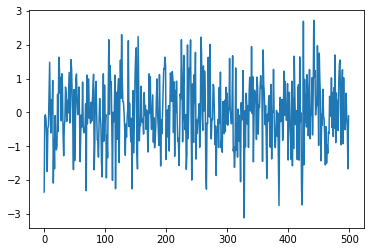

In [12]:
a = 0.1
n_walk_01 = normrwalk(500, a, 0, 1)
plt.plot(n_walk_01)

In [13]:
# Протестируем стационарность ряда при помощи теста Дикки-Фуллера

test = sm.tsa.adfuller(n_walk_01)
print ('p-value: ', test[1])
if test[1]< 0.05: 
    print (' ряд стационарен')
else:
    print ('ряд не стационарен')

p-value:  0.0
 ряд стационарен


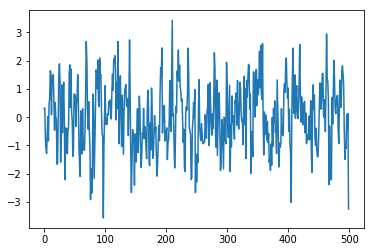

In [14]:
a = 0.5
n_walk_05 = normrwalk(500, a, 0, 1)
plt.plot(n_walk_05)

In [15]:
# Протестируем стационарность ряда при помощи теста Дикки-Фуллера
test = sm.tsa.adfuller(n_walk_05)
print ('p-value: ', test[1])
if test[1]< 0.05: 
    print (' ряд стационарен')
else:
    print ('ряд не стационарен')

p-value:  5.1795524028779314e-24
 ряд стационарен


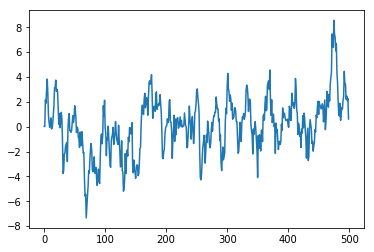

In [16]:
a = 0.9
n_walk_09 = normrwalk(500, a, 0, 1)
plt.plot(n_walk_09)

In [17]:
# Протестируем стационарность ряда при помощи теста Дикки-Фуллера
test = sm.tsa.adfuller(n_walk_09)
print ('p-value: ', test[1])
if test[1]< 0.05: 
    print (' ряд стационарен')
else:
    print ('ряд не стационарен')

p-value:  3.5438060219816133e-06
 ряд стационарен


При а=1 ряд резко меняет поведение и перестает быть стационарным! Это так называемый случай единичного корня, на идее которого и работает тест Дикки-Фуллера

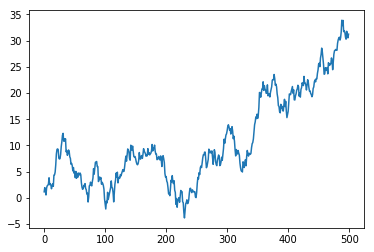

In [18]:
a = 1
n_walk_1 = normrwalk(500, a, 0, 1)
plt.plot(n_walk_1)

In [19]:
# Протестируем стационарность ряда при помощи теста Дикки-Фуллера
test = sm.tsa.adfuller(n_walk_1)
print ('p-value: ', test[1])
if test[1]< 0.05: 
    print (' ряд стационарен')
else:
    print ('ряд не стационарен')

p-value:  0.9218908663399843
ряд не стационарен


#  Задания

**Задание 7.10.1**


Сгенерируйте 100 значений временного ряда по правилу $X_t = 0.2X_{t-1} + 0.1X_{t-2} + \epsilon_t$.

В качестве шумовой компоненты возьмите нормальный белый шум с нулевым средним и единичной дисперсией.

Постройте его график.

Проверьте его на стационарность по критерию Дикки-Фуллера:

In [20]:
# num - число шагов
# a - множитель у элемента t-1
# b - множитель у элемента t-2. 
# В каждый момент времени следующее значение равно a*текущее + b*предыдущее + белый шум
# mu, sigma - параметры шума
def normrwalk(num, a, b, mu, sigma):
    eps = np.random.normal(mu, sigma, size=num)
    walk = np.zeros(num)
    walk[0] = eps[0]
    for i in range (2,num):
        walk[i] = a*walk[i-1] + b*walk[i-2] + eps[i]
    return walk
    

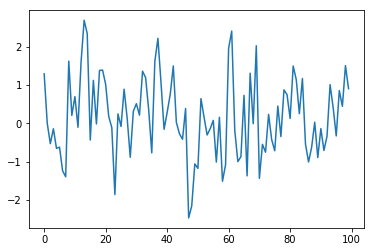

In [22]:
a = 0.2
b = 0.1
n_walk_1 = normrwalk(100, a, b, 0, 1)
plt.plot(n_walk_1)

In [23]:
# Протестируем стационарность ряда при помощи теста Дикки-Фуллера
test = sm.tsa.adfuller(n_walk_1)
print ('p-value: ', test[1])
if test[1]< 0.05: 
    print (' ряд стационарен')
else:
    print ('ряд не стационарен')

p-value:  1.0329191073636385e-10
 ряд стационарен


Сгенерируйте 100 значений временного ряда по правилу $X_t = 0.9X_{t-1} + 0.07X_{t-2} + \epsilon_t$.

В качестве шумовой компоненты возьмите нормальный белый шум с нулевым средним и единичной дисперсией

Постройте его график.

Проверьте его на стационарность по критерию Дикки-Фуллера:

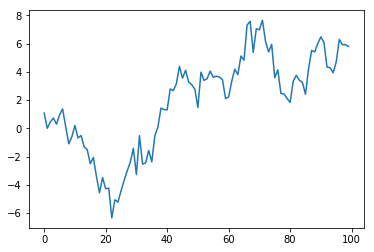

In [24]:
a = 0.9
b = 0.07
n_walk_1 = normrwalk(100, a, b, 0, 1)
plt.plot(n_walk_1)

In [25]:
# Протестируем стационарность ряда при помощи теста Дикки-Фуллера
test = sm.tsa.adfuller(n_walk_1)
print ('p-value: ', test[1])
if test[1]< 0.05: 
    print (' ряд стационарен')
else:
    print ('ряд не стационарен')

p-value:  0.784897044207399
ряд не стационарен
